In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [2]:
# Optional. Declutter output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
np.random.seed(0)
scale_factor = 15
num_data_list=[15*scale_factor]
threshold = 15*15 + 1 #scale factor dependent
num_features_list = np.concatenate([np.arange(1, threshold, 1), np.arange(threshold, 500, 5), np.arange(500, 1001, 50)])
num_repeat_list_small = list(range(3000))
num_repeat_list_large = list(range(50))

100%|██████████| 291/291 [8:58:36<00:00, 111.05s/it]   


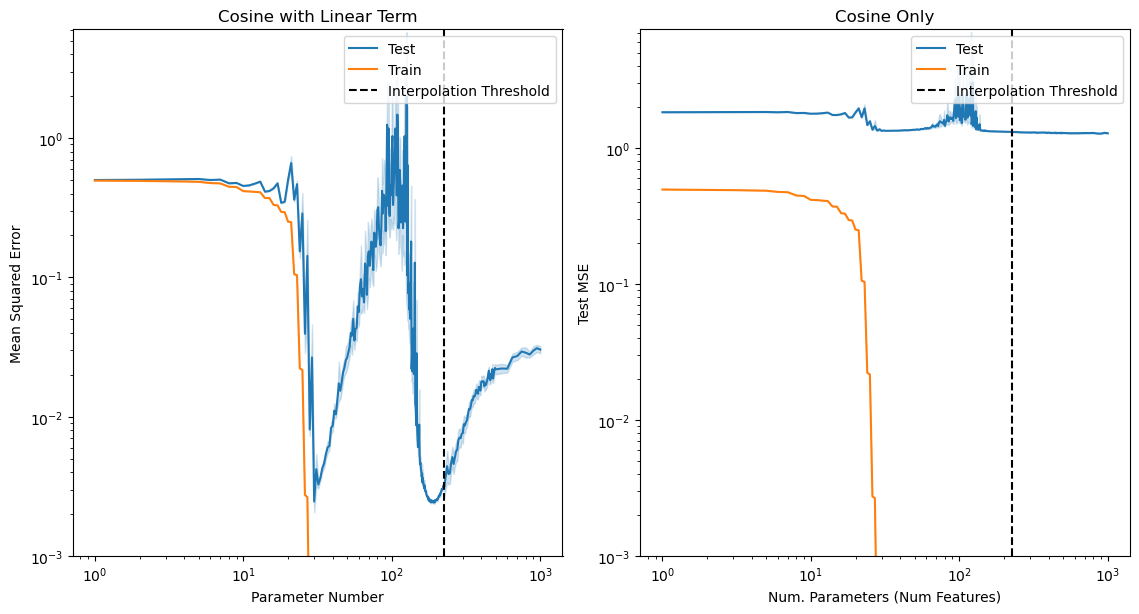

In [56]:
# Create sklearn linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
mse_dfs = []
low, high = -1.0, 1.0
for num_data in num_data_list:
    def compute_y_from_x(X: np.ndarray):
        return np.add(2.0 * X, np.cos(X * 25))[:, 0]
    
    mse_list = []
    # Generate test data.
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
    y_test = compute_y_from_x(X_test)
    fig, axs = plt.subplots(1, 2, figsize=(11.5, 6.25))  # Move this line inside the loop
    for num_features in tqdm(num_features_list):
        feature_degrees = 1 + np.arange(num_features).astype(int)
        if num_features < threshold:
            num_repeat_list = list(range(len(num_repeat_list_small)))
        elif num_features >= threshold:
            num_repeat_list = list(range(len(num_repeat_list_large)))
        else:
            num_repeat_list = list(range(len(num_repeat_list_large)))
            print('Failure to compute threshold')
        for repeat_idx in num_repeat_list:
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )

    mse_df = pd.DataFrame(mse_list)
    mse_dfs.append(mse_df)
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Test MSE",
        label="Test",
        ax=axs[0],
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
        ax=axs[0],
    )
    ax = axs[0]
    ax.set_ylabel("Mean Squared Error")
    ax.set_xlabel("Parameter Number")
    ax.set_ylim(bottom=1e-3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title(f"Cosine with Linear Term")
    ax.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    ax.legend(loc='upper right')

    # Now computing the cosine plot

    def compute_y_from_x_cos(X: np.ndarray):  # Redefining this code
        return np.cos(X * 25)

    # Create sklearn linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)

    mse_list = []
    # Generate test data.
    X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
    y_test = compute_y_from_x_cos(X_test)
    for num_features in tqdm(num_features_list):
        feature_degrees = 1 + np.arange(num_features).astype(int)
        if num_features < threshold:
            num_repeat_list = list(range(len(num_repeat_list_small)))
        elif num_features >= threshold:
            num_repeat_list = list(range(len(num_repeat_list_large)))
        else:
            num_repeat_list = list(range(len(num_repeat_list_large)))
            print('Failure to compute threshold')
        for repeat_idx in num_repeat_list:
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )

    mse_df = pd.DataFrame(mse_list)
    mse_dfs.append(mse_df)
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
       y="Test MSE",
        label="Test",
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
    )
    ax = axs[1]
    ax.set_ylim(bottom=1e-3)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title(f"Cosine Only")
    ax.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

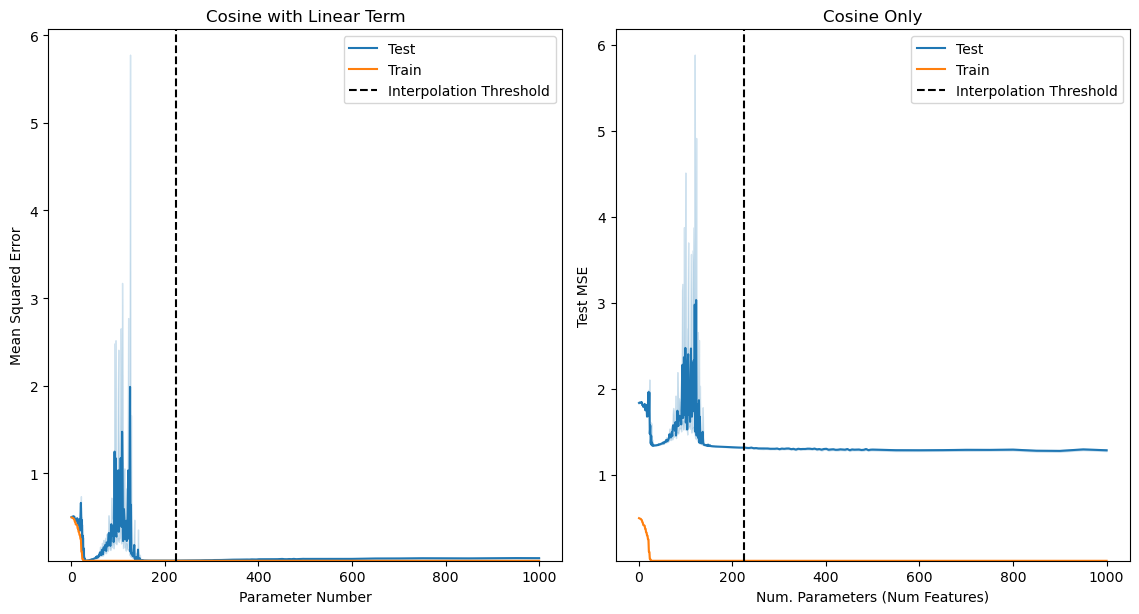

In [61]:
# For making a linear plot of the above

fig, axs = plt.subplots(1, 2, figsize=(11.5, 6.25)) 

[mse_df1, mse_df2] = mse_dfs

mse_df = mse_df1
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
    y="Test MSE",
    label="Test",
    ax=axs[0],
)
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
    y="Train MSE",
    label="Train",
    ax=axs[0],
)
ax = axs[0]
ax.set_ylabel("Mean Squared Error")
ax.set_xlabel("Parameter Number")
ax.set_ylim(bottom=1e-3)
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_title(f"Cosine with Linear Term")
ax.axvline(
    x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
)
ax.legend(loc='upper right')

mse_df = mse_df2
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
   y="Test MSE",
    label="Test",
)
sns.lineplot(
    data=mse_df,
    x="Num. Parameters (Num Features)",
    y="Train MSE",
    label="Train",
)
ax = axs[1]
ax.set_ylim(bottom=1e-3)
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_title(f"Cosine Only")
ax.axvline(
    x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

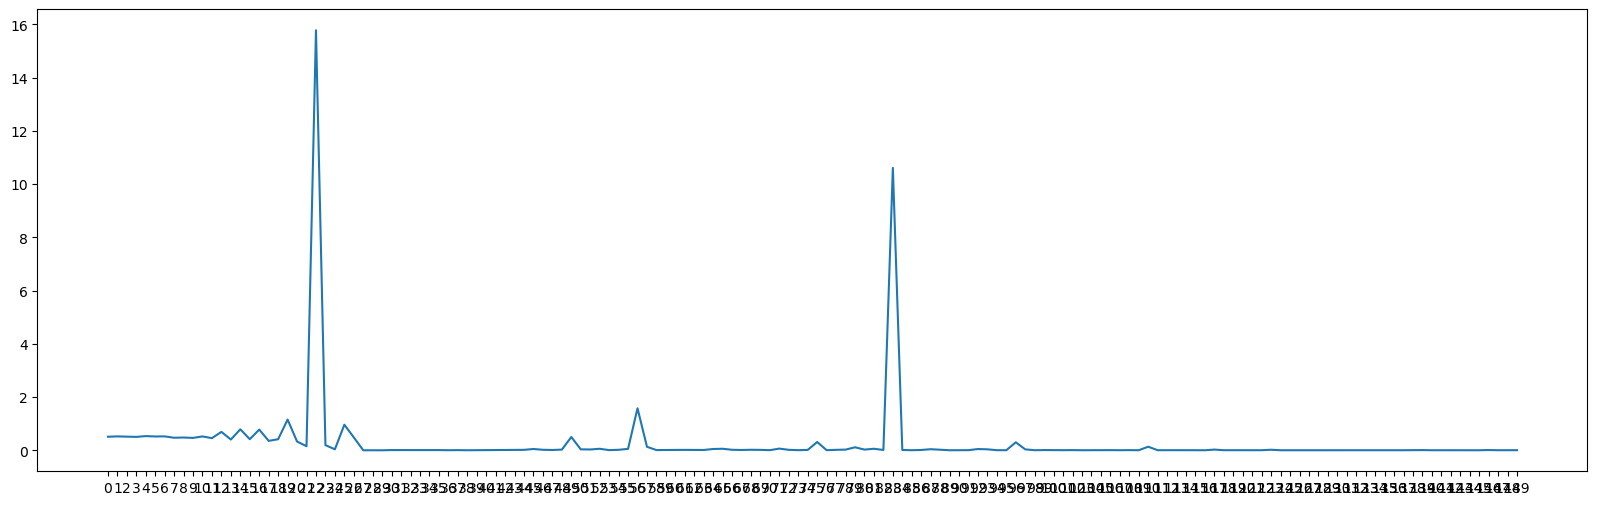

In [49]:
# For taking an individual value of test MSE (from the first repeat of each number of features)
# Useful for quick visualisation.

firstval_list = [mse_df1['Test MSE'][i] for i, idx in enumerate(mse_df2['repeat_idx']) if idx == 0]
plt.close()
plt.rcParams['figure.figsize'] = [20, 6]
plt.plot(firstval_list[0:150])
plt.xticks(range(150))
plt.show()

In [58]:
mse_dfscopy = mse_dfs

In [60]:
print(len(mse_dfs[0]))

678300
